# Custom layer

Tensorflow allows multiple customization levels, since sometimes you may not want to stick with what keras provides or, if you are a researcher trying to design a new layer, in those cases it would be helpful if you could just worry about the changes you want to make without worrying about the rest of the neural network.  

Tensorflow provides multiple ways to create your own layer depending on how much customization you want.

1. Using `Lambda` layers: they contain no trainable parameters and only apply certain functions to the model.
2. Using a class that extends the `tf.keras.layers.Layer` class, and implements its methods.

And in this notebook we will show both, so let's prepare some data and start playing with both.

In [4]:
import tensorflow as tf
import numpy as np

# Lambda layers

It's a simply way to apply simple function that contain no parameters to the data, we use `tf.keras.layers.Lambda` to do that.

let's say you want to create a layer that compute the absolute value. we first need to define the function we want

```python
my_abs = lambda x: tf.abs(x)
```

then pass it to the `Lambda` layer.

```python
from tf.keras.layers import Lambda

...
x = Lambda(my_abs)(x) 
...
```

In [5]:
from tensorflow.keras.layers import Lambda, Dense

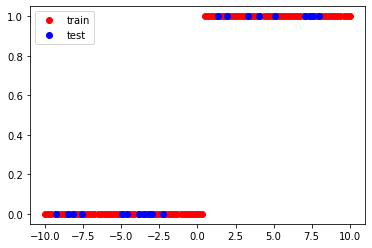

In [6]:
# let's prepare some data for binary classification
mid = 0.5

x = np.linspace(-10, 10, 100)
y = np.array(x > mid, dtype=np.float32)

x_test = np.random.uniform(-10, 10, 20).reshape(-1, 1)
y_test = np.array(x_test > mid, dtype=np.float32)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'])

In [7]:
# create the simplest model, we will create a lambda layer that applies activation
# to the output of previous linear layer

model = tf.keras.Sequential([
  Dense(1),
  Lambda(tf.keras.activations.sigmoid),
])

In [8]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [9]:
history = model.fit(x, y, epochs=15, batch_size=1, validation_split=0.2)

Epoch 1/15
80/80 [==============================] - 1s 4ms/step - loss: 0.1145 - accuracy: 0.9750 - val_loss: 8.1153e-04 - val_accuracy: 1.0000
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9750 - val_loss: 5.6671e-04 - val_accuracy: 1.0000
Epoch 3/15
80/80 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9750 - val_loss: 4.2045e-04 - val_accuracy: 1.0000
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9750 - val_loss: 3.0178e-04 - val_accuracy: 1.0000
Epoch 5/15
80/80 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9750 - val_loss: 2.2652e-04 - val_accuracy: 1.0000
Epoch 6/15
80/80 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9750 - val_loss: 1.7216e-04 - val_accuracy: 1.0000
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9750 - val_loss: 1.3208e-04 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 75ms/step - loss: 0.0132 - accuracy: 1.0000


[0.013231480494141579, 1.0]

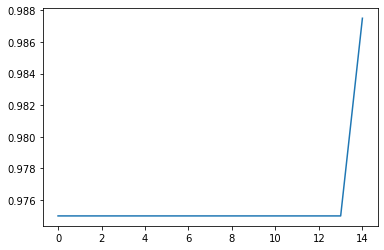

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')

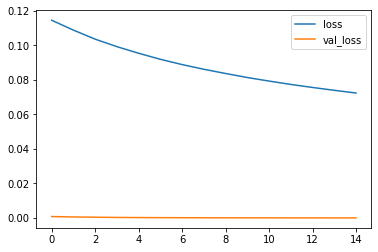

In [12]:
# history plots
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# Subclass Layer

It allows for more custom layers, where you set your own variables and take care of everything regarding how the layer will work, but still tensorflow takes care for parameters update through the optimizer for you.

You simply need to create a child class to `tf.keras.layers.Layer` class, and implement its methods

```python
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, layer_config):
    super(MyLayer, self).__init__()
    # set layers configuration, e.g. what activation to use, number of units ... etc.

  def build(self, input_shape):
    # set layers weights
    # initialize them randomly or however you wish

  def call(self, inputs):
    # process the input with weights and give the output
    return output
```


In [ ]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):

  def __init__(self, units=32):
    '''Initializes the instance attributes'''
    super(SimpleDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    '''Create the state of the layer (weights)'''
    # initialize the weights
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
      name="kernel",
      initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
      trainable=True
    )

    # initialize the biases
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
      name="bias",
      initial_value=b_init(shape=(self.units,), dtype='float32'),
      trainable=True
    )

  def call(self, inputs):
    '''Defines the computation from inputs to outputs'''
    return tf.matmul(inputs, self.w) + self.b